# CIS 4526 Sp23 HomeWork 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [4]:
df = pd.read_csv("/kaggle/input/adult-income-modified/adult_income_modified.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


In [5]:
df.salary.unique()

array(['<=80K', '>80K'], dtype=object)

In [6]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

### Need to replace ?

In [8]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

### Your task is to try different Ensemble Models to predict whether a people will earn <= 80K or > 80K

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* separated data set into training and testing
* performed cross-validations
* Build a base model using LogisticRegression and only a smaller set of features (say only numerical features)
* Try different ensemble methods, including VotingClassifier (soft and hard voting), BaggingClassifier, AdaBoostClassifier, GradientBoostClassifier and xgb with the same set of features
* Comment on your experience in these various models, in particular compare this with the basic LogisticRegression
* Out of all these ensemble model, pick the best model, add additional featrues (eg categorical features)
* Comment on the final best model you find

### Good Luck !!!

Show all your work below

### EDA

In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32571.000000,3.257100e+04,32571.000000,32571.000000,32571.000000,32571.000000
mean,38.599153,1.898091e+05,10.080747,1077.317982,87.435357,40.452151
std,13.744795,1.055927e+05,2.572484,7384.182377,403.204587,12.441330
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178215e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783830e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.371095e+05,12.000000,0.000000,0.000000,45.000000
max,250.000000,1.484705e+06,16.000000,99999.000000,4356.000000,202.000000


**Working 202 hours per week and having an age up to 250 seems improbable. Will replace those value with the median of the distribution**

In [10]:
# remove data that are obviously wrong, no need to do it extensively, just use the above table as a hint
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

**No missing values**

In [11]:
# .... TODO age, hours per week
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [12]:
df.age = df.age.apply(lambda x: df.age.median() if x > 65 else x)
df.age.sort_values()

26        0.0
12608    17.0
23667    17.0
3240     17.0
12293    17.0
         ... 
17668    65.0
12763    65.0
12688    65.0
1283     65.0
13773    65.0
Name: age, Length: 32571, dtype: float64

In [13]:
df['hours-per-week'] = df['hours-per-week'].apply(lambda x: df['hours-per-week'].median() if x > 168 else x)
df['hours-per-week'].sort_values()

25085     1.0
9148      1.0
1263      1.0
5767      1.0
1037      1.0
         ... 
10144    99.0
21063    99.0
29758    99.0
25838    99.0
14594    99.0
Name: hours-per-week, Length: 32571, dtype: float64

In [14]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32571.000000,3.257100e+04,32571.000000,32571.000000,32571.000000,32571.000000
mean,37.341408,1.898091e+05,10.080747,1077.317982,87.435357,40.437322
std,12.009230,1.055927e+05,2.572484,7384.182377,403.204587,12.345535
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178215e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783830e+05,10.000000,0.000000,0.000000,40.000000
75%,46.000000,2.371095e+05,12.000000,0.000000,0.000000,45.000000
max,65.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Median hours per week was 99 hours. Working 14 hours every day for 7 days a week is not impossible. Working till the age of 65 is nice.**

In [15]:
df['salary'].unique()

array(['<=80K', '>80K'], dtype=object)

<AxesSubplot:xlabel='salary', ylabel='count'>

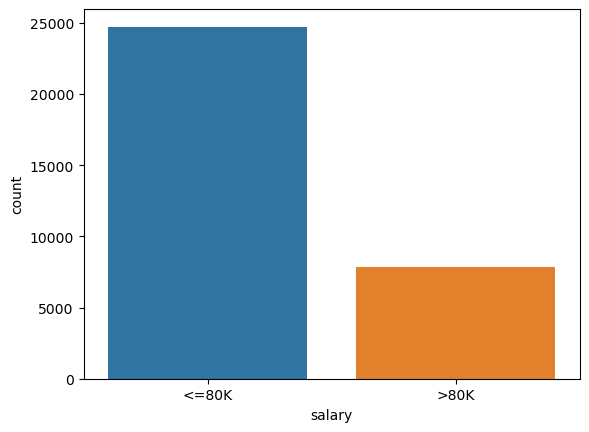

In [16]:
# df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
sns.countplot(x='salary',data=df)

In [17]:
numerical_features = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week']
ndf = df[numerical_features]

In [18]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
X_train, X_test, y_train, y_test = train_test_split(ndf, 
                                                    df['salary'], test_size=0.20, 
                                                    random_state=100)

In [19]:
df.salary.unique()

array([0, 1])

### Before you try any more advance models, let's try a LogisticRegression model

In [20]:
model = LogisticRegression(random_state=100) # random_state=100
model.fit(X_train,y_train)

LogisticRegression(random_state=100)

In [21]:
predictions = model.predict(X_test)

In [22]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      4876
           1       0.73      0.27      0.39      1639

    accuracy                           0.79      6515
   macro avg       0.76      0.62      0.63      6515
weighted avg       0.78      0.79      0.75      6515

0.7907904834996162


In [23]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=100), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=100)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4876
           1       0.83      0.29      0.43      1639

    accuracy                           0.81      6515
   macro avg       0.82      0.63      0.66      6515
weighted avg       0.81      0.81      0.77      6515

0.8058326937835764


In [25]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=200, 
                             learning_rate=0.5, random_state=100)
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4876
           1       0.71      0.41      0.52      1639

    accuracy                           0.81      6515
   macro avg       0.77      0.68      0.70      6515
weighted avg       0.80      0.81      0.79      6515

0.8104374520337683


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(learning_rate=0.5, random_state=100)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4876
           1       0.83      0.36      0.51      1639

    accuracy                           0.82      6515
   macro avg       0.82      0.67      0.70      6515
weighted avg       0.82      0.82      0.79      6515

0.8207214121258634


In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# log_clf = LogisticRegression(random_state=100)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=100)
svm_clf = SVC(gamma="scale", probability=True, random_state=100)

for clf in (model, rnd_clf, svm_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(classification_report(y_test, y_pred))
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print('\n')
    


              precision    recall  f1-score   support

           0       0.80      0.97      0.87      4876
           1       0.73      0.27      0.39      1639

    accuracy                           0.79      6515
   macro avg       0.76      0.62      0.63      6515
weighted avg       0.78      0.79      0.75      6515

LogisticRegression 0.7907904834996162


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4876
           1       0.57      0.49      0.53      1639

    accuracy                           0.78      6515
   macro avg       0.71      0.68      0.69      6515
weighted avg       0.77      0.78      0.77      6515

RandomForestClassifier 0.7805065234075211


              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4876
           1       0.97      0.15      0.27      1639

    accuracy                           0.79      6515
   macro avg       0.88      0.58      0.57 

In [28]:
voting_clf = VotingClassifier(estimators=[('lr', model), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(voting_clf.__class__.__name__, accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4876
           1       0.95      0.26      0.40      1639

    accuracy                           0.81      6515
   macro avg       0.87      0.63      0.64      6515
weighted avg       0.84      0.81      0.76      6515

VotingClassifier 0.8092095165003838


In [29]:
voting_clf = VotingClassifier(estimators=[('lr', model), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(voting_clf.__class__.__name__, accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      4876
           1       0.92      0.28      0.43      1639

    accuracy                           0.81      6515
   macro avg       0.86      0.64      0.66      6515
weighted avg       0.83      0.81      0.77      6515

VotingClassifier 0.8139677666922487


**Soft voting has better performance compared to hard voting. I think the average of probabilities in the case classification problems make more sense as well.**

In [30]:
try:
    import xgboost as xgb
except:
    import os
    os.system("pip install xgboost")

In [31]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(learning_rate=0.1, random_state=100, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4876
           1       0.92      0.32      0.48      1639

    accuracy                           0.82      6515
   macro avg       0.87      0.66      0.69      6515
weighted avg       0.84      0.82      0.79      6515

0.8230237912509594


**Xgboost has the best performance so will use xgboost with additional caterical features, validate it and see how it performs. Model complexity doesn't matter as much as data statistical significance and sampling. This idea is reinforced by how each iteratively complex model tried, there isn't much better performance. More complex models work better when there are distinctive qualitative significance in the data**

In [32]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,0


In [33]:
cat = df.select_dtypes(include=['object']).columns.tolist()
cat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [34]:
df[cat].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
dtype: int64

In [35]:
with_cat_df = pd.get_dummies(df, columns=cat)
with_cat_df.shape

(32571, 109)

In [36]:
X,y = with_cat_df.drop('salary',axis=1),with_cat_df.salary
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20, 
                                                    random_state=100)

xgb_clf = xgb.XGBClassifier(learning_rate=0.01, random_state=100, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4876
           1       0.81      0.57      0.67      1639

    accuracy                           0.86      6515
   macro avg       0.84      0.76      0.79      6515
weighted avg       0.85      0.86      0.85      6515

0.8570990023023791


**Classification performance of xgboost increased by 3% with added categorical features**

In [37]:
# Type in your code and answers
# perform a 10-fold cross validation
for i in range(10):
    X_t, X_test, Y_t, y_test = train_test_split(X, y, test_size=0.2, random_state = i*42)
    xgb_clf.fit(X_t, Y_t)
    y_pred = xgb_clf.predict(X_test)
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4923
           1       0.78      0.57      0.66      1592

    accuracy                           0.86      6515
   macro avg       0.83      0.76      0.78      6515
weighted avg       0.85      0.86      0.85      6515

0.8560245587106677
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5008
           1       0.79      0.57      0.66      1507

    accuracy                           0.86      6515
   macro avg       0.83      0.76      0.79      6515
weighted avg       0.86      0.86      0.86      6515

0.8649270913277053
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4938
           1       0.78      0.54      0.64      1577

    accuracy                           0.85      6515
   macro avg       0.82      0.75      0.77      6515
weighted avg       0.85      0.85   

**Random sampling 10 different times using the same model gets similar performance at 85% with additional categorical features. This may imply that the performance xgboost with categorical features at 85% is not due to sampling luck**

##  TODO comment entire process and findings here, mention something about soft and hard voting, cross validation only for best model